In [1]:
import data
import preprocessing
import exportation
import settings

import joblib

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# *****************************************************************
# ------------------------ Program parameters ----------------------
# *****************************************************************

enseigne = 'Auchan'

# Exploration des données d'entrainement

In [80]:
df = data.data_extraction.BDD_Promo('BigQuery', enseigne)

print('Dataframe shape :', df.shape)
print('Data Columns', df.columns)


Querying BigQuery for training data...
Querying and loading time = 110.62 s 
Request finished

Dataframe shape : (198513, 37)
Data Columns Index(['Annee', 'SemaineDebut', 'NomOpe', 'DateDebutConso', 'DateFinConso',
       'Enseigne', 'DirectionRegionale', 'ZoneCVR', 'SecteurCM', 'NomMagasin',
       'CodeMagasin', 'CAMagasin', 'CAMagasinEnPromo', 'TotalVentesUCMag',
       'TotalVentesUCMagEnPromo', 'IndiceMagPromophile', 'CodeSAPProduit',
       'EANProduit', 'NomProduit', 'UmbrellaBrand', 'NBPotsParUC', 'FlagInno',
       'DureeEnJoursDepuisLancement', 'TotalVentesUCMarque',
       'IndiceMarquePromophile', 'TotalVentesProductBrandEnUC',
       'TotalVentesProductBrandPromoEnUC', 'IndiceProductBrandPromophile',
       'Mecanique', 'EncodageMecaniquePromo', 'BaselineOSA', 'PreviVol',
       'FamilleProduit', 'TauxDeDegradation', 'NBJours',
       'FacteurdDeRisqueVirtuel', 'VentesUC'],
      dtype='object')


In [81]:
#Data Cleaning
df_clean = preprocessing.training_set_preprocessing.training_set_cleaning(df)

print('Dataframe shape :', df_clean.shape)

Dataframe shape : (198513, 24)


In [82]:
df_clean.isna().sum()

SemaineDebut                           0
CAMagasin                              0
CAMagasinEnPromo                       0
TotalVentesUCMag                       0
TotalVentesUCMagEnPromo                0
IndiceMagPromophile                    0
UmbrellaBrand                        237
NBPotsParUC                          237
FlagInno                               0
DureeEnJoursDepuisLancement          237
TotalVentesUCMarque                 1910
IndiceMarquePromophile              1910
TotalVentesProductBrandEnUC         4073
TotalVentesProductBrandPromoEnUC       0
IndiceProductBrandPromophile        4073
Mecanique                              0
EncodageMecaniquePromo                 0
BaselineOSA                         3964
PreviVol                               0
FamilleProduit                      1556
TauxDeDegradation                      0
NBJours                                0
FacteurdDeRisqueVirtuel                0
VentesUC                               0
dtype: int64

In [86]:
df_clean = df_clean.dropna()
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SemaineDebut,188683.0,2.486574e+01,1.525448e+01,1.000000,1.100000e+01,2.300000e+01,4.000000e+01,5.200000e+01
CAMagasin,188683.0,5.867341e+05,2.741581e+05,157877.330000,3.767495e+05,5.294533e+05,7.521721e+05,1.751901e+06
CAMagasinEnPromo,188683.0,1.406536e+05,7.367969e+04,34322.800000,8.414186e+04,1.287254e+05,1.876656e+05,4.584393e+05
TotalVentesUCMag,188683.0,2.805451e+05,1.293709e+05,79215.000000,1.867450e+05,2.541400e+05,3.527160e+05,8.205370e+05
TotalVentesUCMagEnPromo,188683.0,7.212175e+04,3.738040e+04,18903.000000,4.276500e+04,6.581200e+04,9.282600e+04,2.368230e+05
IndiceMagPromophile,188683.0,2.532984e-01,3.332825e-02,0.190921,2.331032e-01,2.542096e-01,2.730346e-01,3.684661e-01
NBPotsParUC,188683.0,6.868632e+00,4.417012e+00,1.000000,4.000000e+00,4.000000e+00,1.000000e+01,2.400000e+01
FlagInno,188683.0,1.953806e-01,3.964945e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
DureeEnJoursDepuisLancement,188683.0,9.083127e+02,1.358778e+03,1.000000,1.510000e+02,3.600000e+02,9.310000e+02,8.974000e+03
TotalVentesUCMarque,188683.0,5.702602e+06,3.402255e+06,114128.000000,1.936806e+06,6.983293e+06,9.191768e+06,9.191768e+06


## Visualisation

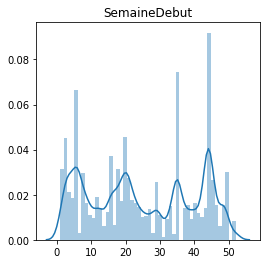

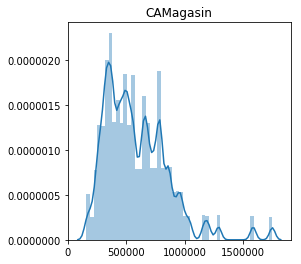

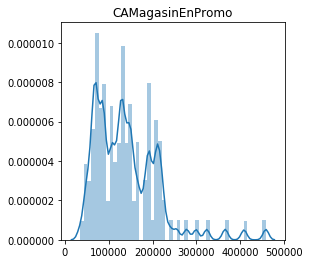

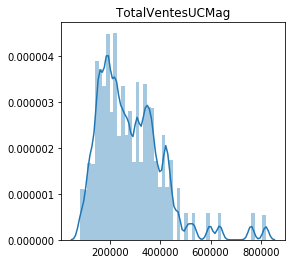

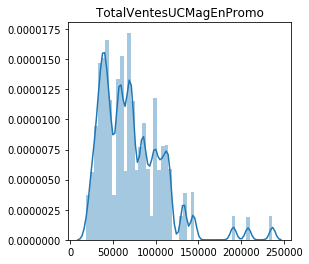

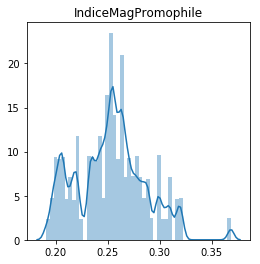

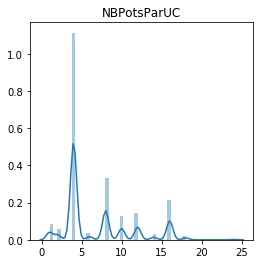

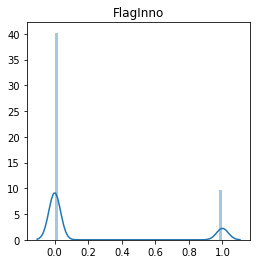

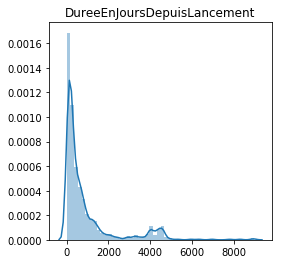

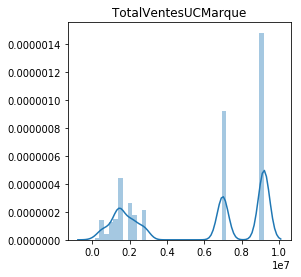

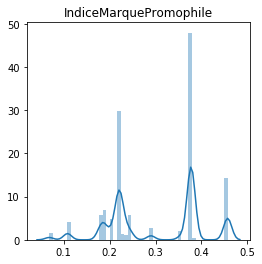

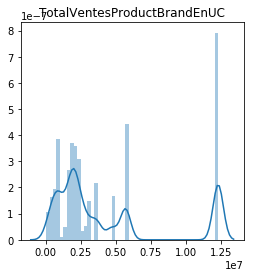

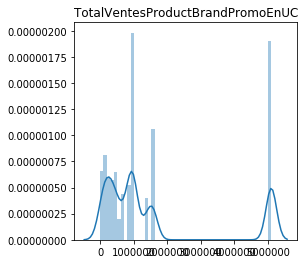

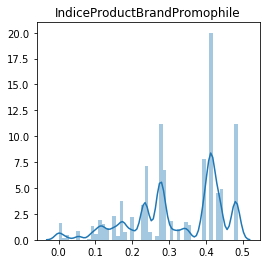

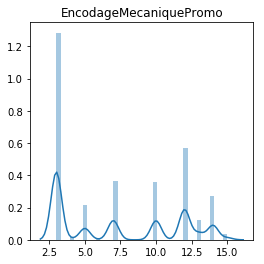

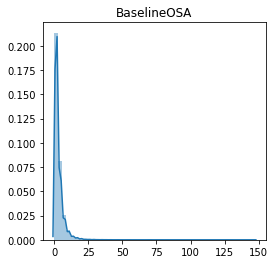

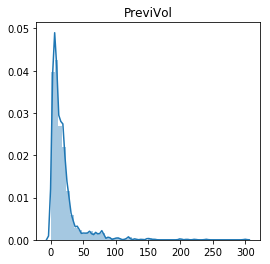

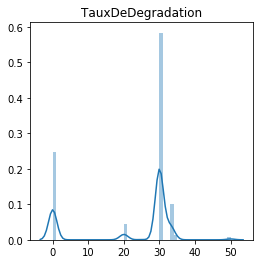

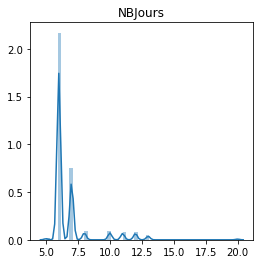

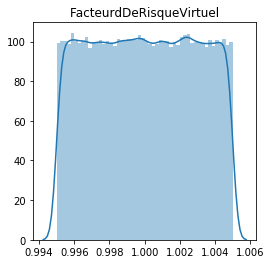

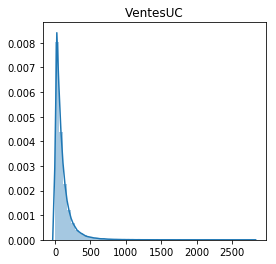

In [84]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

for col in df_clean.select_dtypes(include=numerics).columns:
    fig = plt.figure
    fig(figsize =(4,4))
    plt.title(col)
    sns.distplot(df_clean[[col]])
    

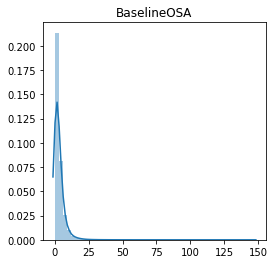

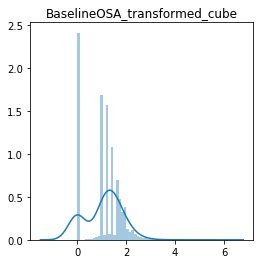

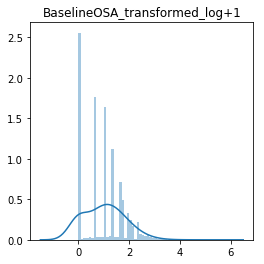

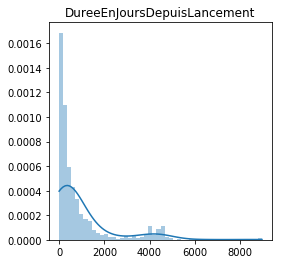

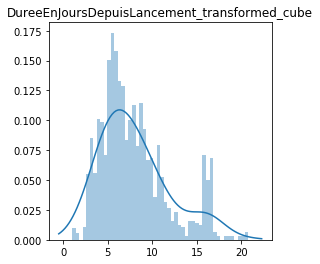

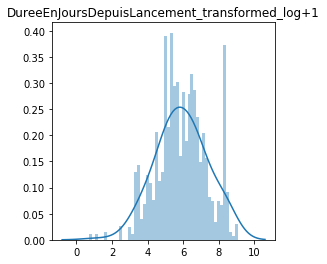

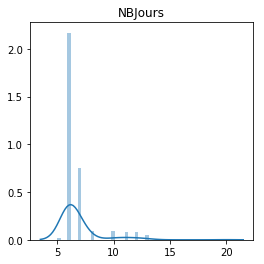

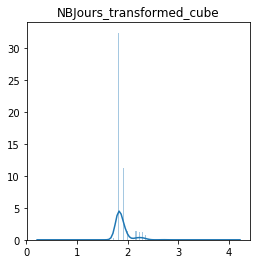

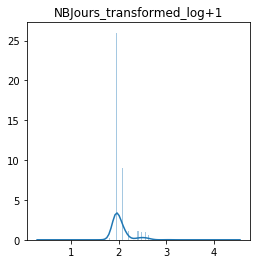

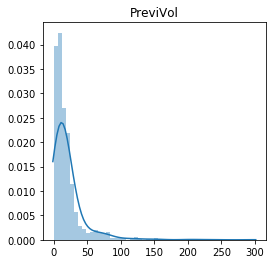

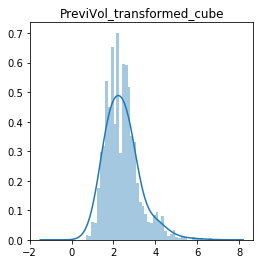

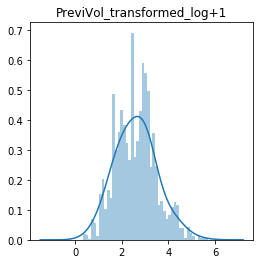

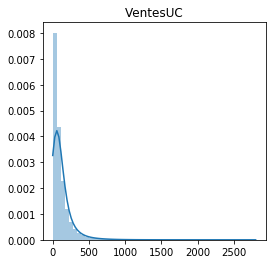

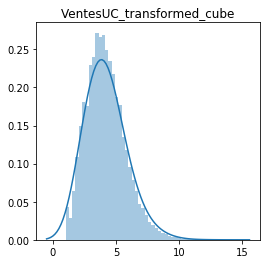

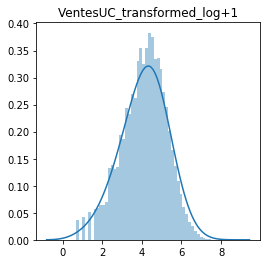

In [96]:
#Afficher la skewness des données
skewness_values = df_clean.skew(numeric_only  = True)
numerical_columns = df_clean.copy().select_dtypes(include=numerics)
skewness_values

for i in range(0,len(skewness_values)):
    if skewness_values[i] > 2 :
        numerical_columns[skewness_values.index[i]+'_transformed_cube'] = numerical_columns[skewness_values.index[i]]**(1/3)
        numerical_columns[skewness_values.index[i]+'_transformed_log+1'] = np.log(numerical_columns[skewness_values.index[i]] + 1)
    elif skewness_values[i] < -1:
        numerical_columns[skewness_values.index[i]+'_transformed_cube'] = numerical_columns[skewness_values.index[i]]**(1/3)
        numerical_columns[skewness_values.index[i]+'_transformed_square'] = numerical_columns[skewness_values.index[i]]**(2)
    elif skewness_values[i] > 1.5 and numerical_columns[skewness_values.index[i]].min() > 0:
        numerical_columns[skewness_values.index[i]+'_transformed_sqrt'] = numerical_columns[skewness_values.index[i]]**(1/2)
    else:
        numerical_columns = numerical_columns.drop(skewness_values.index[i], axis = 1)
    
numerical_columns = numerical_columns.sort_index(axis  =1)

for col in numerical_columns:
    fig = plt.figure
    fig(figsize =(4,4))
    plt.title(col)
    sns.distplot(numerical_columns[[col]],  kde_kws={'bw':0.5})

## Encodage des colonnes

In [ ]:
#Data Encoding
print('\nPerforming training data encoding')
df_encoded = preprocessing.training_set_preprocessing.feature_encoding(df_clean)
print('Data encoding finished\n')

df_encoded.describe()

In [ ]:
fig = plt.figure
fig(figsize =(12,10))

sns.heatmap(df_encoded.corr(), center = 0)
